### Hipótese 1 (MLPRegressor)
`Matheus Raz (mrol@cin.ufpe.br)`

`João Paulo Lins (jplo@cin.ufpe.br)`

#### É possível prever o número de vendas globais de um game baseado no seu gênero, rating, publisher e plataforma?

In [73]:
from IPython.display import display

import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [74]:
df = pd.read_csv('vgsalesPP2.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Name,Platform_left,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,"mixi, Inc",responDESIGN,AO,E,E10+,EC,K-A,M,RP,T
0,Wii Sports,Wii,2006,Sports,Nintendo,1.000000,1.000000,0.368885,0.799432,1.000000,...,0,0,0,1,0,0,0,0,0,0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,0.703095,0.123619,0.666341,0.072848,0.487580,...,0,0,0,1,0,0,0,0,0,0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,0.379110,0.440608,0.370841,0.311258,0.430389,...,0,0,0,1,0,0,0,0,0,0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,0.377418,0.377417,0.320939,0.279092,0.397068,...,0,0,0,1,0,0,0,0,0,0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,0.272485,0.306975,1.000000,0.094607,0.380104,...,0,0,0,1,0,0,0,0,0,0
5,Tetris,GB,1989,Puzzle,Nintendo,0.560928,0.078039,0.412916,0.054872,0.366655,...,0,0,0,1,0,0,0,0,0,0
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,0.272727,0.315608,0.636008,0.272469,0.361081,...,0,0,0,1,0,0,0,0,0,0
7,Wii Play,Wii,2006,Misc,Nintendo,0.337524,0.316989,0.286693,0.268685,0.350418,...,0,0,0,1,0,0,0,0,0,0
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,0.349130,0.239641,0.459883,0.211921,0.343148,...,0,0,0,1,0,0,0,0,0,0
9,Duck Hunt,NES,1984,Shooter,Nintendo,0.651112,0.021754,0.027397,0.044465,0.343027,...,0,0,0,1,0,0,0,0,0,0


In [75]:
all_genres = df.loc[:,'Action':'Strategy'].copy().copy()
all_ratings = df.loc[:,'AO':'T'].copy()
all_platforms = df.loc[:,'2600':'XOne'].copy()
all_publishers = df.loc[:,'10TACLE Studios':'responDESIGN'].copy()
genres_and_ratings = all_genres.join(all_ratings).copy()
platforms_and_publishers = all_platforms.join(all_publishers).copy()

X = genres_and_ratings.join(platforms_and_publishers).values.copy()
y = df["Global_Sales"].values.copy()

In [76]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [77]:
y

array([1.00000000e+00, 4.87580274e-01, 4.30388949e-01, ...,
       1.21168060e-04, 1.21168060e-04, 1.21168060e-04])

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [79]:
scores = []
for i in range(5, 100):
    mlp = MLPRegressor(
        hidden_layer_sizes=(i,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
        learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
        random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
        early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model = mlp.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    scores.append(model.score(X_test, y_test))

In [81]:
best_result = 0
for i in scores:
    if(i > best_result):
        best_result = i

best_hidden_layer_sizes = scores.index(best_result) + 1
print("Melhor resultado:",best_result,"para",best_hidden_layer_sizes,"camadas escondidas")

Melhor resultado: 0.15689742752075853 para 43 camadas escondidas


### Conclusão

Variando da 5 a 100 o número de camadas da Rede Neural MLP Regressor o melhor resultado obitido foi de apenas 15% de taxa de acerto. Sendo assim, a hipótese de que seria possível prever o número de vendas globais de um game baseado no seu gênero, rating, publisher e plataforma foi refutada.

In [82]:
mlp = MLPRegressor(
    hidden_layer_sizes=(best_hidden_layer_sizes,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
mlp

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(43,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=9, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Score: 0.0232801046162312


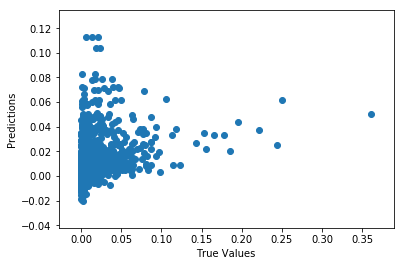

In [83]:
model = mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
print("Score:", model.score(X_test, y_test))

In [84]:
scores = cross_val_score(model, X, y, cv=6)
print ("Cross-validated scores:", scores)

Cross-validated scores: [-3.56271672e-01 -4.35831082e+01 -2.45221344e+02 -5.57120558e+02
 -1.37866501e+03 -2.92653606e+03]


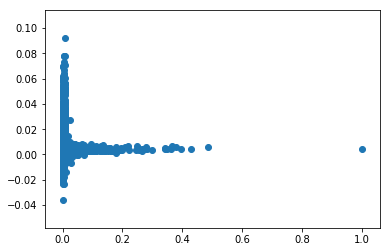

In [85]:
predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)

In [86]:
accuracy = metrics.r2_score(y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: -0.13085496771291116
